In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random

In [2]:
plt.style.use('ggplot')

# Args

In [3]:
EXP = "exp6"
PLATFORM = "IONTORRENT"

In [4]:
MAPPING = 'KMA' # BLAST
BARCODE_SYSTEM = 'AKB' #'AKB' #

In [5]:
def pd_fill_diagonal(df_matrix, value=0): 
    mat = df_matrix.values
    n = mat.shape[0]
    mat[range(n), range(n)] = value
    return pd.DataFrame(mat)

In [6]:
def plot_intra_vs_inter(simila, title):
    labels = ['intra', 'inter']

    plt.figure(figsize=(3,5))
    plt.boxplot(simila, widths=(0.5, 0.5))
    plt.xticks(range(1, len(labels) + 1), labels)
    plt.ylabel("Similarity")
    plt.title("%s" %title)
    plt.xlim(0.6,2.4)

    # Text
    medians = simila.median(axis=1).values
    nobs = simila.shape[1]
    for l in range(1, len(labels)+1):
        plt.text(l, medians[l-1], "n: %i" %nobs, ha='center', va='bottom')#+medians[l-1]*0.005


    # Statistical annotation
    statistic, pvalue = stats.ttest_ind(simila.iloc[[0],:].values[0],
                                        simila.iloc[[1],:].values[0],
                                        equal_var=False)
    if (pvalue/2.0 < 0.05) & (statistic > 0): # One-tailed 'greater-than' test
        y, h = simila.max().max() + simila.max().max() * 0.01, 2 * simila.max().max() * 0.005
        plt.plot([1, 1, 2, 2], [y, y+h, y+h, y], lw=1.5, c='k')
        plt.text(1.5, y+h, "p = %.6f" %pvalue, ha='center', va='bottom', color='k')
    #plt.savefig(OUT_DIR + "pooled/min%i/%s.pdf" %(min_mhc_umi_count, title), bbox_inches='tight')
    plt.show()

## Input

In [7]:
IN_FILE = ("/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" +
           EXP + "_CAT_" + PLATFORM + "_" + MAPPING + "_" + BARCODE_SYSTEM +
           "/similarity_assessment/cdr3.csv")

In [8]:
GEM_FIL = ("/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" +
           EXP + "_CAT_" + PLATFORM + "_" + MAPPING + "_" + BARCODE_SYSTEM +
           "/specificity_matrix/peptide_per_clonotype_by_gem_size/num_clonotype/exclude_single-chain_TCRs/unique_gems/b2.t2.ecs_False.ess_False.lst")

## Output dir

In [9]:
OUT_DIR = ("/Volumes/tuba/herpov/tcr-pmhc-sc-project/plots/" +
           EXP + "_" + PLATFORM + "_" + MAPPING + "_" + BARCODE_SYSTEM +
           "/similarity_assessment/cdr3/")

# Main

In [10]:
total_df = pd.read_csv(IN_FILE)

In [11]:
unique_gems = np.loadtxt(GEM_FIL, dtype='U20')

In [12]:
total_df = total_df.loc[total_df.gem.isin(unique_gems), np.append(total_df.columns[:10], total_df.columns.intersection(unique_gems))]

In [13]:
total_df.iloc[:, :10]

,gem,ct,clonotype,num_clonotype,epitope,peptide,umi_count_mhc,umi_count_tcr,binding_concordance,cdr3
0,AAAGCAATCTCGCTTG-1,60.0,clonotype17,17.0,v15,VTEHDTLLY,8.0,5.0,1.000000,CVVNMYDFGNEKLTFCSARTIGGPEAFF
2,AACCGCGTCTGACCTC-1,20.0,clonotype5,5.0,ADIR,SVAPALALFPA,3.0,38.0,0.769231,CSNSGSRLTFCASSQGTAEKLFF
4,AAGGCAGCAGACTCGC-1,14.0,clonotype3,3.0,v14,TPRVTGGGAM,6.0,5.0,0.863636,CATVLRMDSSYKLIFCASSQIGEGHGDEQFF
5,AATCCAGAGCGAGAAA-1,86.0,clonotype6,6.0,v14,TPRVTGGGAM,5.0,13.0,0.875000,CVVSGFQKLVFCASSSHDWGGQGSPLHF
6,ACACCCTGTGAGTGAC-1,14.0,clonotype3,3.0,v14,TPRVTGGGAM,4.0,9.0,0.863636,CATVLRMDSSYKLIFCASSQIGEGHGDEQFF
...,...,...,...,...,...,...,...,...,...,...
147,TGTTCCGAGTATCTCG-1,19.0,clonotype6,6.0,v14,TPRVTGGGAM,10.0,17.0,0.875000,CAVRAPMDSSYKLIFCASSSHDWGGQGSPLHF
148,TTAGGACCAGATGGGT-1,9.0,clonotype1,1.0,ADIR,SVAPALALFPA,4.0,47.0,0.318182,CALTGGGNKLTFCAIRKQDQNTGELFF
150,TTAGTTCCATGTAGTC-1,9.0,clonotype1,1.0,KLL,KLLEIAPNC,5.0,67.0,0.454545,CALTGGGNKLTFCAIRKQDQNTGELFF
151,TTCTCCTAGACTGGGT-1,19.0,clonotype6,6.0,v14,TPRVTGGGAM,5.0,24.0,0.875000,CAVRAPMDSSYKLIFCASSSHDWGGQGSPLHF


## Plot heatmap

In [30]:
color_cdr3 = ['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#ffffbf','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2'] * total_df.peptide.unique().shape[0]
my_palette = dict(zip(total_df.peptide.unique(), color_cdr3))
row_colors = total_df.peptide.map(my_palette)

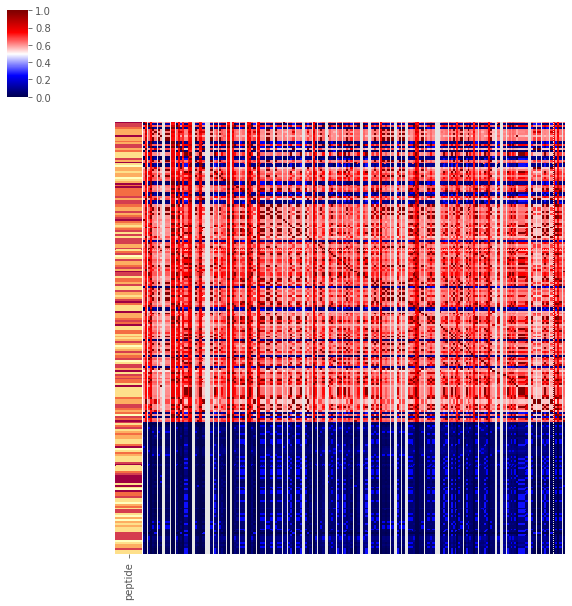

In [31]:
# https://python-graph-gallery.com/404-dendrogram-with-heat-map/
# https://stackoverflow.com/questions/27988846/how-to-express-classes-on-the-axis-of-a-heatmap-in-seaborn
sns.clustermap(total_df.iloc[:, 10:], standard_scale=1,
               row_cluster=False, col_cluster=False,
               row_colors=row_colors,
               xticklabels=False, yticklabels=False, cmap='seismic')# col_colors=row_colors
#plt.savefig(OUT_DIR + "heatmap/all.png")
plt.show()

# Find maximal intra- and inter-peptide similarity

In [10]:
def pd_fill_diagonal(df_matrix, value=0): 
    mat = df_matrix.values
    n = mat.shape[0]
    mat[range(n), range(n)] = value
    return pd.DataFrame(mat)

In [77]:
intra = list()
inter = dict()
peptides = np.append(total_df.peptide.unique()[2:5], total_df.peptide.unique()[6:10])
peptides = total_df.peptide.unique()
df = total_df[total_df.peptide.isin(peptides)].drop_duplicates(subset=['cdr3']).set_index('gem') #NB! Removing GEMs with same CDR3 even though they bind different peptides
for pep in peptides:
    # Intra
    i = df[df.peptide == pep].drop_duplicates(subset=['cdr3']).index
    matrix = pd_fill_diagonal(df.loc[i,i], np.nan) #.iloc[i,i+5]
    intra.append(matrix.max().max())
    
    # Inter
    j = df[df.peptide != pep].drop_duplicates(subset=['cdr3']).index
    matrix = df.loc[i,j] #iloc[j, j+5]
    matrix.columns = df.loc[j,:].peptide
    inter[pep] = matrix.max().groupby('peptide').max().values

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


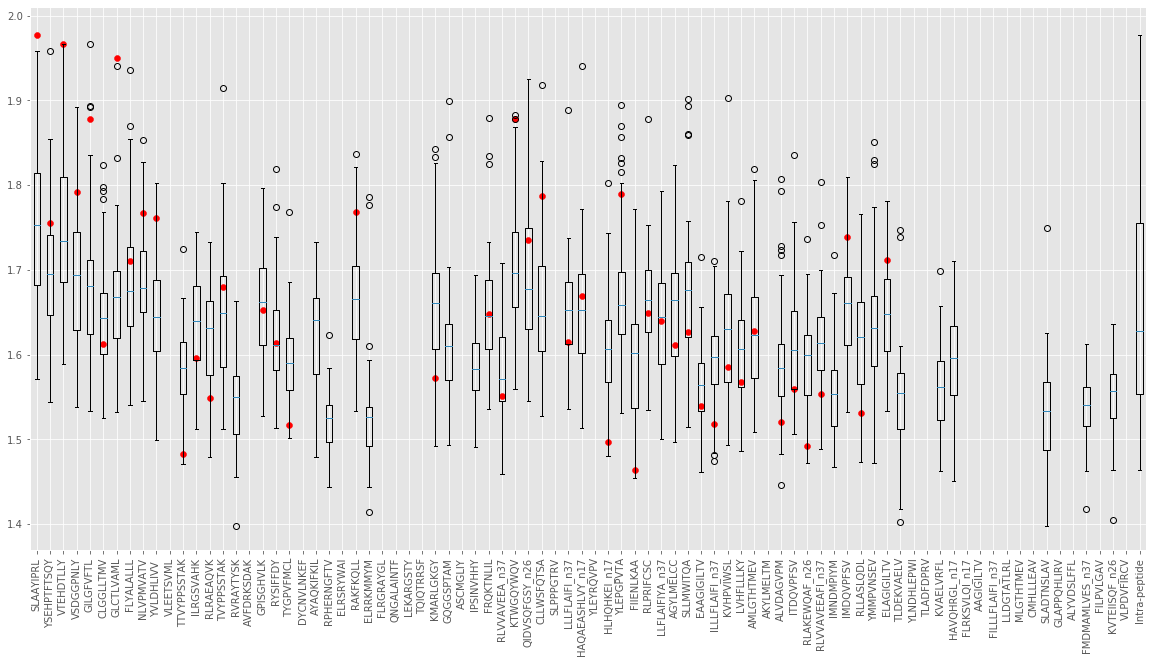

In [76]:
fig = plt.figure(figsize=(20,10))
labels, data = [*zip(*inter.items())]  # 'transpose' items to parallel key, value lists

labels += ('Intra-peptide',)
intra = np.array(intra)
data += (intra[~np.isnan(intra)],)

plt.boxplot(data)
plt.scatter(list(range(1, len(peptides)+1)), intra, c='red')
plt.xticks(range(1, len(labels) + 1), labels, rotation=90)
plt.show()

# V2

In [20]:
def sort_by_peptides():
    sorter = list(peptides)
    sorter.remove(pep)
    sorterIndex = dict(zip(sorter,range(len(sorter))))
    inter['rank'] = inter.index.map(sorterIndex)
    inter.sort_values(['rank'], ascending=True, inplace=True)
    inter.drop(['rank'], 1, inplace=True)

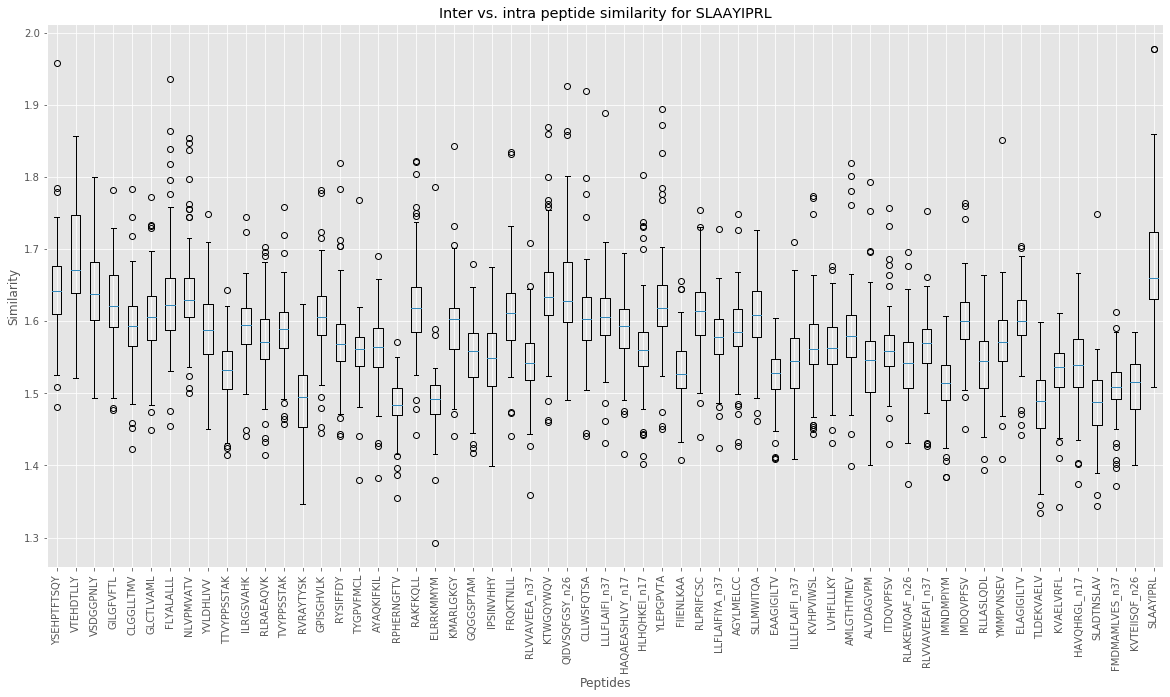

YSEHPTFTSQY	0.0007863535336156403
VSDGGPNLY	0.00023593724878736528
GILGFVFTL	8.942257553378427e-08
CLGGLLTMV	3.6512777523366526e-15
GLCTLVAML	1.6363302469296596e-11
FLYALALLL	2.5576566259191284e-05
NLVPMVATV	8.458718050557397e-05
YVLDHLIVV 	7.187869485843583e-16
TTVYPPSSTAK	2.4699770945849616e-31
ILRGSVAHK	8.308805611259087e-16
RLRAEAQVK	3.8906601551068836e-20
TVYPPSSTAK	3.0564814736498684e-16
RVRAYTYSK	2.6099016716746894e-41
GPISGHVLK	1.6008513920666655e-11
RYSIFFDY	6.367446520428159e-19
TYGPVFMCL	2.4943566054538404e-24
AYAQKIFKIL	8.446608477048709e-23
RPHERNGFTV	6.898364548764912e-42
RAKFKQLL	4.2527375276359764e-08
ELRRKMMYM	4.404063453215891e-41
KMARLGKGY	4.910033996161802e-14
GQGGSPTAM	1.0513693428284674e-25
IPSINVHHY	3.358117725290846e-27
FRQKTNLIL	6.570037394353107e-10
RLVVAVEEA_n37	1.4443659221832695e-27
KTWGQYWQV	0.00027388029235041547
QIDVSQFGSY_n26	0.0017425409637249114
CLLWSFQTSA	6.161270953032019e-11
LLLFLAIFI_n37	1.3401127466560733e-11
HAQAEASHLVY_n17	1.3317483931133305e-1

In [45]:
peptides = np.append(total_df.peptide.unique()[2:5], total_df.peptide.unique()[6:10])
peptides = total_df.peptide.unique()
df = total_df[total_df.peptide.isin(peptides)].drop_duplicates(subset=['cdr3']).set_index('gem') #NB! Removing GEMs with same CDR3 even though they bind different peptides
for pep in peptides:
    # Intra
    i = df[df.peptide == pep].drop_duplicates(subset=['cdr3']).index
    matrix = pd_fill_diagonal(df.loc[i,i], np.nan) #.iloc[i,i+5]
    matrix.columns = i
    intra = matrix.max()
    
    # Inter
    j = df[df.peptide != pep].drop_duplicates(subset=['cdr3']).index
    matrix = df.loc[j,np.append(['peptide'], i)]
    inter = matrix.groupby('peptide').max()
    sort_by_peptides()
    
    simila = inter.append(intra, ignore_index=True)
    labels = np.append(inter.index.values, pep)
    
    plt.figure(figsize=(20,10))
    plt.boxplot(simila)
    plt.xticks(range(1, len(labels) + 1), labels, rotation=90)
    plt.ylabel("Similarity")
    plt.xlabel("Peptides")
    plt.title("Inter vs. intra peptide similarity for %s" %pep)
    #plt.savefig(OUT_DIR + "selected_few/%s.pdf" %pep)
    plt.show()
    
    for e in range(len(simila)):
        statistic, pvalue = stats.ttest_ind(simila.iloc[[-1],:].values[0],
                                            simila.iloc[[e],:].values[0],
                                            equal_var=False)
        if pvalue < 0.005:
            print(labels[e], pvalue, sep="\t")
    break

# V3

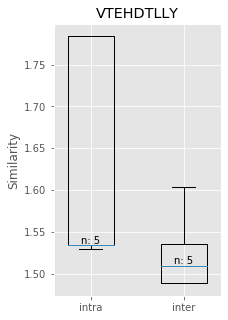

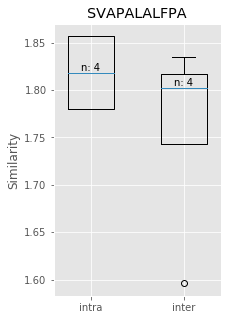

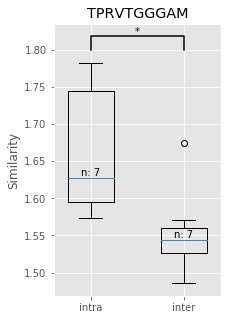

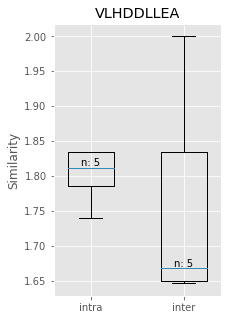

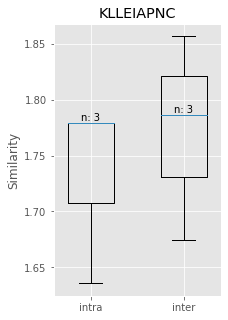

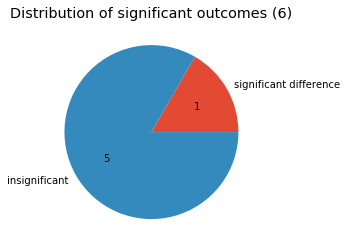

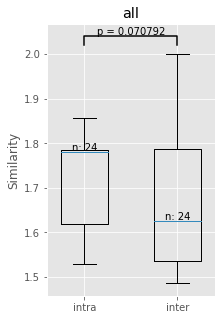

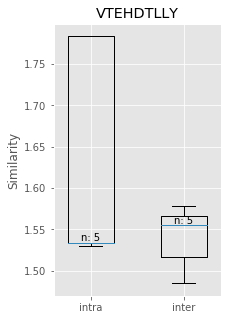

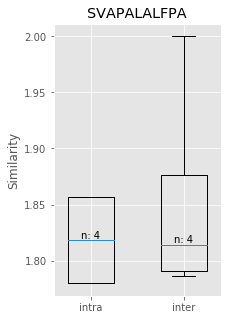

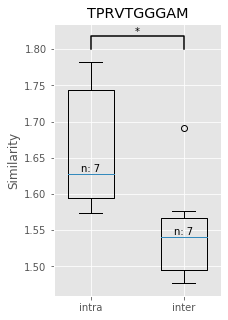

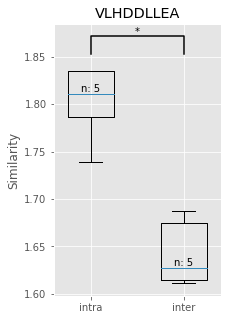

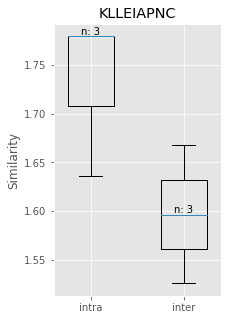

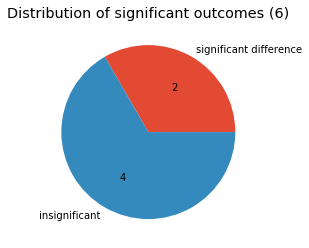

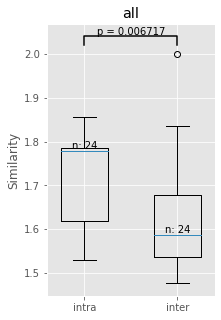

In [14]:
mhc_umi_counts = [1, 2]
#min_tcr_umi_count = 2
min_binding_concordance = 0.05
for min_mhc_umi_count in sorted(mhc_umi_counts, reverse=True):
    intra_scores = list()
    inter_scores = list()
    significance_count = 0

    df = total_df[(total_df.umi_count_mhc >= min_mhc_umi_count)].set_index('gem') #.drop_duplicates(subset=['cdr3']) NB! Removing GEMs with same CDR3 even though they bind different peptides

    peptides = total_df.peptide.unique()
    for pep in peptides:
        # Intra
        i = df[(df.peptide == pep) & (df.binding_concordance >= min_binding_concordance)].drop_duplicates(subset=['cdr3']).index
        matrix = pd_fill_diagonal(df.loc[i,i], np.nan) #.iloc[i,i+5]
        matrix.columns = i
        intra = matrix.max()

        # Inter
        indexes = df[(~df.peptide.isin([pep, 'SLAAYIPRL'])) & (df.binding_concordance >= min_binding_concordance)].drop_duplicates(subset=['cdr3']).index
        j = random.sample(indexes.to_list(), len(i))
        matrix = df.loc[j, i]
        inter = matrix.max()

        simila = pd.DataFrame([intra, inter])
        labels = ['intra', 'inter']

        nobs = simila.shape[1]

        if nobs > 1:
            # Make boxplot
            plt.figure(figsize=(3,5))
            plt.boxplot(simila, widths=(0.5, 0.5))
            plt.xticks(range(1, len(labels) + 1), labels)
            plt.ylabel("Similarity")
            plt.title("%s" %pep) #Inter vs. intra peptide similarity for 
            plt.xlim(0.6,2.4)

            # Text on boxplot
            medians = simila.median(axis=1).values
            for l in range(1, len(labels)+1):
                plt.text(l, medians[l-1], "n: %i" %nobs, ha='center', va='bottom')#+medians[l-1]*0.005

            # Statistical annotation
            statistic, pvalue = stats.ttest_ind(simila.iloc[[0],:].values[0],
                                                simila.iloc[[1],:].values[0],
                                                equal_var=False)
            if (pvalue/2.0 < 0.05) & (statistic > 0): # One-tailed 'greater-than' test
                significance_count += 1

                y, h = simila.max().max() + simila.max().max() * 0.01, 2 * simila.max().max() * 0.005
                plt.plot([1, 1, 2, 2], [y, y+h, y+h, y], lw=1.5, c='k')
                plt.text(1.5, y+h, "*", ha='center', va='bottom', color='k')    

            #plt.savefig(OUT_DIR + "individual/min%i/%s.pdf" %(min_mhc_umi_count, pep), bbox_inches='tight')
            plt.show()
            
            # Store similarity scores for peptides with minimum 9 TCRs
            intra_scores += intra.to_list()
            inter_scores += inter.to_list()

    plt.pie([significance_count, len(peptides)-significance_count],
            labels=['significant difference', 'insignificant'],
            autopct=lambda p: '{:.0f}'.format(p * len(peptides) / 100))
    plt.title("Distribution of significant outcomes (%i)" %len(peptides))
    #plt.savefig(OUT_DIR + "pooled/min%i/significant_outcomes.pdf" %min_mhc_umi_count, bbox_inches='tight')
    plt.show()
    
    if min_mhc_umi_count == max(mhc_umi_counts):
        tnobs = len(intra_scores)
    else:
        intra_scores = random.sample(intra_scores, tnobs)
        inter_scores = random.sample(inter_scores, tnobs)
    
    plot_intra_vs_inter(pd.DataFrame({'intra': intra_scores, 'inter': inter_scores}, columns=['intra', 'inter']).T,
                        "all")

In [27]:
simila

gem,CCATTCGTCAACCAAC-1
0,NaN
1,1.491476


In [35]:
total_df[(total_df.umi_count_mhc >= 2)].drop_duplicates(subset=['cdr3'])

,gem,ct,clonotype,num_clonotype,epitope,peptide,umi_count_mhc,umi_count_tcr,binding_concordance,cdr3,...,TGAGGGAGTCCCTTGT-1,GCTTGAACACACTGCG-1,CCAGCGAAGGTTCCTA-1,CCTTCCCTCTCTGCTG-1,TGGTTCCAGCCCAATT-1,ATTACTCGTTCCACAA-1,GTGTGCGAGGACAGCT-1,TCATTACTCTCAACTT-1,CTGATAGAGCTCCTCT-1,TAGCCGGCACAGATTC-1
0,AAAGCAATCTCGCTTG-1,60.0,clonotype17,17.0,v15,VTEHDTLLY,8.0,5.0,1.000000,CVVNMYDFGNEKLTFCSARTIGGPEAFF,...,1.558769,1.523955,1.508721,1.491794,1.465969,1.533984,1.486727,1.493357,1.493357,1.487576
2,AGCTTGAGTTACGACT-1,51.0,clonotype15,15.0,v15,VTEHDTLLY,9.0,17.0,1.000000,CVVNAANTDKLIFCATSDLGGSWQTQYF,...,1.592696,1.526599,1.543645,1.482888,1.538936,1.629153,1.570164,1.507962,1.507962,1.542552
5,GTACGTAGTCTTCTCG-1,93.0,clonotype84,84.0,v15,VTEHDTLLY,16.0,7.0,1.000000,CAVGRVIQGAQKLVFCASSPTRMRGAVRRADTQYF,...,1.466263,1.450853,1.443027,1.448247,1.441917,1.476558,1.430321,1.456522,1.456522,1.458349
6,TCTATTGGTCGAATCT-1,145.0,clonotype99,99.0,v15,VTEHDTLLY,6.0,5.0,1.000000,CASPPGGAQKLVFCASSPTRMRGAVRRADTQYF,...,1.489385,1.482727,1.381811,1.443473,1.444596,1.510595,1.467144,1.468423,1.468423,1.459920
7,TGCTACCTCAACACGT-1,45.0,clonotype14,14.0,v15,VTEHDTLLY,4.0,9.0,0.666667,CVVNIPQNTGGFKTIFCASSPGTGTYGYTF,...,1.536581,1.465806,1.460958,1.443872,1.405127,1.571067,1.482466,1.487891,1.487891,1.499323
10,CTAGTGAAGCACCGCT-1,14.0,clonotype3,3.0,v14,TPRVTGGGAM,10.0,26.0,0.863636,CATVLRMDSSYKLIFCASSQIGEGHGDEQFF,...,1.550986,1.463789,2.000000,1.493676,1.501691,1.541478,1.497777,1.486131,1.486131,1.529710
34,TGTGGTATCCTCTAGC-1,19.0,clonotype6,6.0,v14,TPRVTGGGAM,9.0,22.0,0.875000,CAVRAPMDSSYKLIFCASSSHDWGGQGSPLHF,...,1.485534,1.377614,1.577831,1.440479,1.426795,1.492610,1.477356,1.431954,1.431954,1.493669
38,AATCCAGAGCGAGAAA-1,86.0,clonotype6,6.0,v14,TPRVTGGGAM,5.0,13.0,0.875000,CVVSGFQKLVFCASSSHDWGGQGSPLHF,...,1.543840,1.456039,1.507693,1.432194,1.507069,1.533532,1.524103,1.447252,1.447252,1.491171
43,CTAGCCTCATCCTTGC-1,146.0,clonotype65,65.0,v14,TPRVTGGGAM,7.0,22.0,1.000000,CAMREGKDSSYKLIFCASSLHDREGVRSPLHF,...,1.534828,1.479566,1.539796,1.475519,1.465242,1.479644,1.485546,1.476016,1.476016,1.482412
45,GACACGCGTATTCTCT-1,239.0,clonotype74,74.0,v14,TPRVTGGGAM,11.0,41.0,1.000000,CAVRAPMDSSYKLIFCASSFRQGQDTGELFF,...,1.566745,1.471084,1.627264,1.525510,1.570256,1.548541,1.501055,1.498648,1.498648,1.523834


In [36]:
total_df[(total_df.peptide == 'KLLEIAPNC') & (total_df.umi_count_mhc >= 2)]#.drop_duplicates(subset=['cdr3'])

,gem,ct,clonotype,num_clonotype,epitope,peptide,umi_count_mhc,umi_count_tcr,binding_concordance,cdr3,...,TGAGGGAGTCCCTTGT-1,GCTTGAACACACTGCG-1,CCAGCGAAGGTTCCTA-1,CCTTCCCTCTCTGCTG-1,TGGTTCCAGCCCAATT-1,ATTACTCGTTCCACAA-1,GTGTGCGAGGACAGCT-1,TCATTACTCTCAACTT-1,CTGATAGAGCTCCTCT-1,TAGCCGGCACAGATTC-1
67,CTCTAATAGTCGTTTG-1,20.0,clonotype12,12.0,KLL,KLLEIAPNC,11.0,30.0,0.250000,CSNSGSRLTFCASSQGTAEKLFF,...,2.000000,1.646172,1.550986,1.525766,1.649120,1.653630,1.619587,1.575486,1.575486,1.569732
70,CCATTCGTCAACCAAC-1,9.0,clonotype4,4.0,KLL,KLLEIAPNC,4.0,38.0,0.800000,CALTGGGNKLTFCAIRKQDQNTGELFF,...,1.627497,1.739397,1.479337,1.475463,1.786063,1.599470,1.587564,1.559974,1.559974,1.497007
71,GTCTTCGAGCTAACAA-1,9.0,clonotype4,4.0,KLL,KLLEIAPNC,4.0,55.0,0.800000,CALTGGGNKLTFCAIRKQDQNTGELFF,...,1.627497,1.739397,1.479337,1.475463,1.786063,1.599470,1.587564,1.559974,1.559974,1.497007
72,CATCGGGCAGGACCCT-1,9.0,clonotype4,4.0,KLL,KLLEIAPNC,3.0,13.0,0.800000,CALTGGGNKLTFCAIRKQDQNTGELFF,...,1.627497,1.739397,1.479337,1.475463,1.786063,1.599470,1.587564,1.559974,1.559974,1.497007
74,CACCAGGCAATCTACG-1,9.0,clonotype4,4.0,KLL,KLLEIAPNC,4.0,58.0,0.800000,CALTGGGNKLTFCAIRKQDQNTGELFF,...,1.627497,1.739397,1.479337,1.475463,1.786063,1.599470,1.587564,1.559974,1.559974,1.497007
78,GTTAAGCCATCCTAGA-1,16.0,clonotype1,1.0,KLL,KLLEIAPNC,26.0,68.0,0.454545,CVVNNARLMFCAIRKQDQNTGELFF,...,1.635631,1.518981,1.519049,1.464166,1.856685,1.569798,1.526985,1.466699,1.466699,1.437283
79,TGATTTCAGCGATGAC-1,9.0,clonotype1,1.0,KLL,KLLEIAPNC,4.0,18.0,0.454545,CALTGGGNKLTFCAIRKQDQNTGELFF,...,1.627497,1.739397,1.479337,1.475463,1.786063,1.599470,1.587564,1.559974,1.559974,1.497007
82,GTCATTTTCTCGATGA-1,9.0,clonotype1,1.0,KLL,KLLEIAPNC,5.0,13.0,0.454545,CALTGGGNKLTFCAIRKQDQNTGELFF,...,1.627497,1.739397,1.479337,1.475463,1.786063,1.599470,1.587564,1.559974,1.559974,1.497007
86,TCAGATGAGAATAGGG-1,9.0,clonotype1,1.0,KLL,KLLEIAPNC,8.0,43.0,0.454545,CALTGGGNKLTFCAIRKQDQNTGELFF,...,1.627497,1.739397,1.479337,1.475463,1.786063,1.599470,1.587564,1.559974,1.559974,1.497007
87,GGTGTTACACCAGCAC-1,9.0,clonotype1,1.0,KLL,KLLEIAPNC,6.0,27.0,0.454545,CALTGGGNKLTFCAIRKQDQNTGELFF,...,1.627497,1.739397,1.479337,1.475463,1.786063,1.599470,1.587564,1.559974,1.559974,1.497007


In [11]:
peptides = total_df.peptide.unique()

In [32]:
df[(df.peptide == 'VSDGGPNLY') & (df.binding_concordance >= 0.5)]

,clonotype,epitope,peptide,read_counts_mhc,binding_concordance,cdr3,TCGGGACCAGGTGGAT-1,CGAACATAGTCGCCGT-1,GATGCTAAGCTAAACA-1,TCATTTGTCATGTCTT-1,...,TTGTAGGGTTGCTCCT-1,TTTACTGTCTAAGCCA-1,TTTATGCAGTACGCGA-1,TTTCCTCCACAGGCCT-1,TTTCCTCTCAGTGTTG-1,TTTGCGCTCCTCTAGC-1,TTTGCGCTCGCATGGC-1,TTTGGTTCACGTGAGA-1,TTTGGTTGTACTTGAC-1,TTTGTCACAGCAGTTT-1
gem,,,,,,,,,,,,,,,,,,,,,
AACGTTGTCATAGCAC-1,clonotype108,v19,VSDGGPNLY,37.0,0.5,CAAASNTGNQFYFCSASELGPTISNEQFF,1.546707,1.546707,1.546707,1.546707,...,1.542825,1.579487,1.520760,1.526068,1.520938,1.524855,1.557570,1.543344,1.520534,1.571996
GCAAACTTCCACGTGG-1,clonotype98,v19,VSDGGPNLY,30.0,1.0,CASREASYDKVIFCASSPPDGYEQYF,1.474644,1.474644,1.474644,1.474644,...,1.558335,1.559801,1.510614,1.548335,1.550183,1.554310,1.518572,1.584650,1.564961,1.553835
CTAACTTGTTTGTTTC-1,clonotype73,v19,VSDGGPNLY,1.0,0.5,CAASWRPDSGGGADGLTFCSASKREVWNIQYF,1.469606,1.469606,1.469606,1.469606,...,1.435189,1.390516,1.378523,1.410542,1.399020,1.388798,1.459475,1.423449,1.335193,1.499239
AACTCTTTCTCAACTT-1,clonotype594,v19,VSDGGPNLY,34.0,1.0,CGTATYNTDKLIFCASSALLAGAWTDTQYF,1.471851,1.471851,1.471851,1.471851,...,1.517882,1.563005,1.494179,1.576663,1.559031,1.533948,1.510673,1.571577,1.495377,1.496394
AAGCCGCCACGGTTTA-1,clonotype616,v19,VSDGGPNLY,57.0,1.0,CAVAHWRTASKLTFCASSLELAGANEQFF,1.484064,1.484064,1.484064,1.484064,...,1.606867,1.574580,1.532918,1.514680,1.552478,1.556687,1.535695,1.559441,1.514911,1.550268
AATCCAGTCAATAAGG-1,clonotype327,v19,VSDGGPNLY,39.0,0.5,CAARQLEYGNKLVFCASSGQQSSGANVLTF,1.515052,1.515052,1.515052,1.515052,...,1.636073,1.556837,1.545131,1.468632,1.593367,1.517187,1.529783,1.556573,1.555994,1.497593
ACCGTAAAGGCTCATT-1,clonotype689,v19,VSDGGPNLY,1.0,1.0,CAMRGPGYSTLTFCASSPTAPGDTEAFF,1.508201,1.508201,1.508201,1.508201,...,1.539222,1.519545,1.506516,1.485293,1.507316,1.566623,1.551283,1.519406,1.523363,1.500646
ACCTTTACATCACCCT-1,clonotype702,v19,VSDGGPNLY,1.0,1.0,CALSDSMDSSYKLIFCASSFAGISYEQYF,1.513689,1.513689,1.513689,1.513689,...,1.593509,1.612522,1.513938,1.548660,1.561559,1.598159,1.535067,1.604155,1.551473,1.598900
ACGGCCAGTAAATGTG-1,clonotype749,v19,VSDGGPNLY,1.0,1.0,CALSEETGANSKLTFCSVDTDRGSSYNEQFF,1.546772,1.546772,1.546772,1.546772,...,1.559048,1.549872,1.507548,1.517424,1.526446,1.544479,1.561611,1.523456,1.482026,1.549249


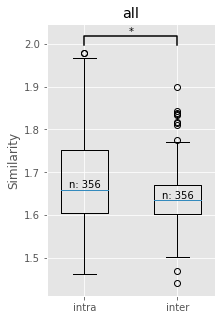

In [22]:
plot_intra_vs_inter(pd.DataFrame({'intra': intra_scores, 'inter': inter_scores}, columns=['intra', 'inter']).T, "all")

In [27]:
a.shape

(582, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2968ebd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2968d550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a29689f90>,
 'medians': [<matplotlib.lines.Line2D at 0x1a2968ed50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a22c7b6d0>,
 'means': []}

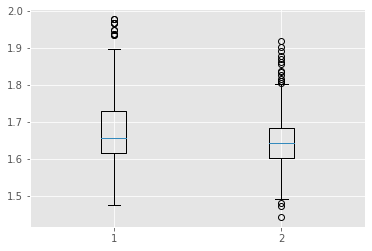

In [26]:
plt.boxplot(a.T)

# V4

SLAAYIPRL	2.6036443098462023e-07


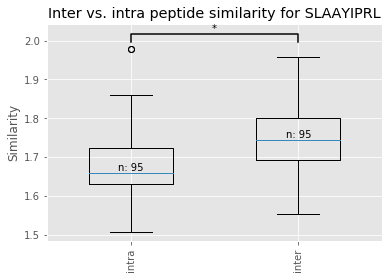

YSEHPTFTSQY	6.223290703061226e-07


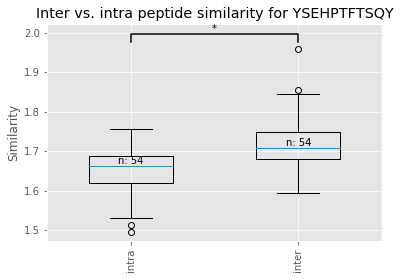

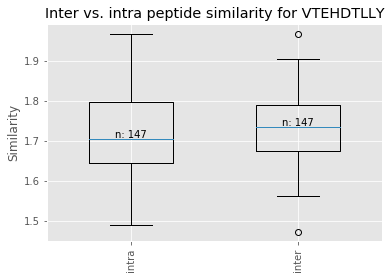

VSDGGPNLY	6.128875579439431e-08


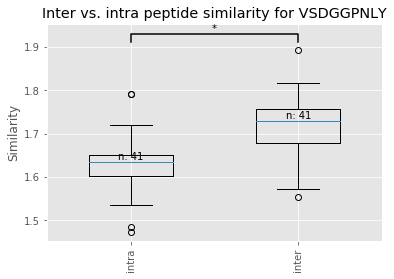

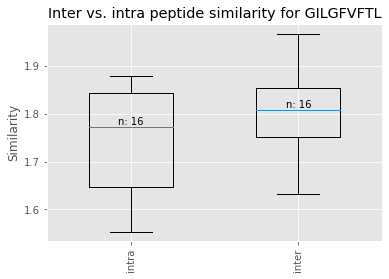

CLGGLLTMV	0.04062617718727722


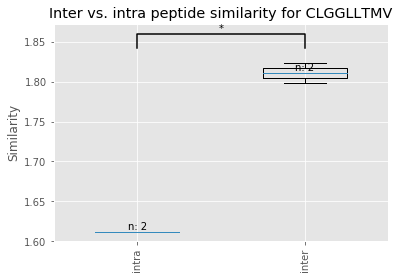

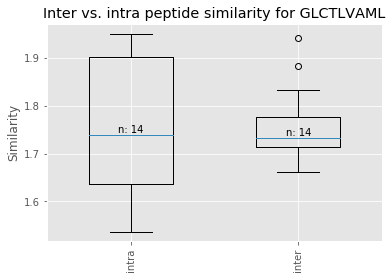

FLYALALLL	2.728055901330803e-05


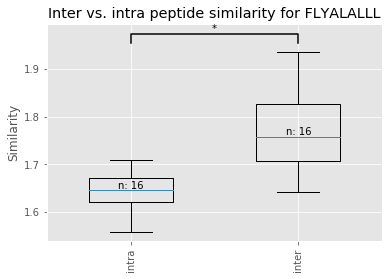

NLVPMVATV	0.0001559005373654274


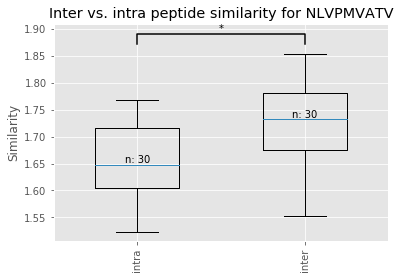

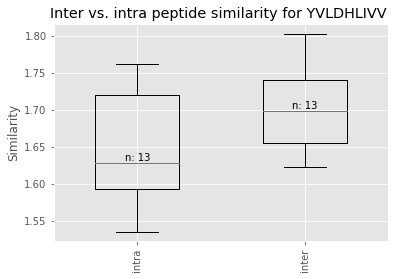

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


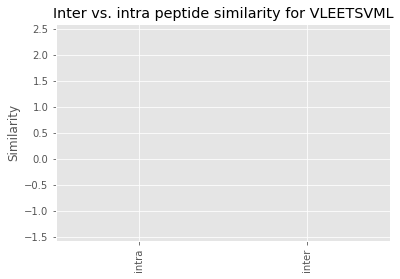

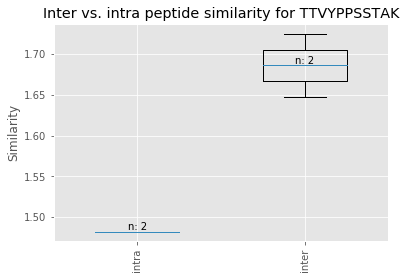

ILRGSVAHK	0.004216205185916712


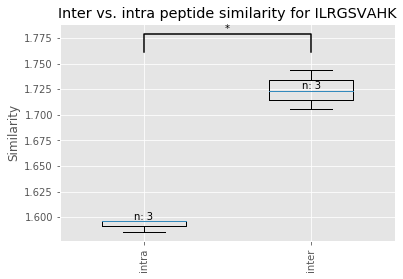

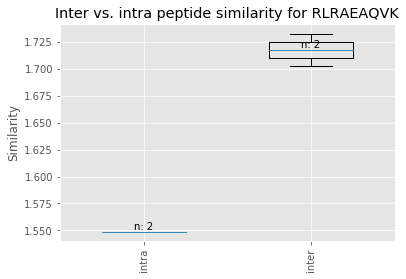

TVYPPSSTAK	0.01629197679797802


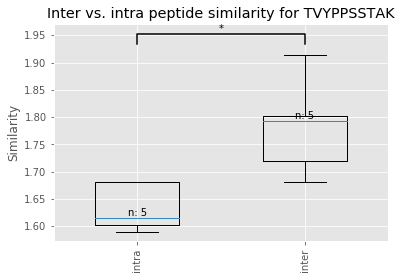

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values


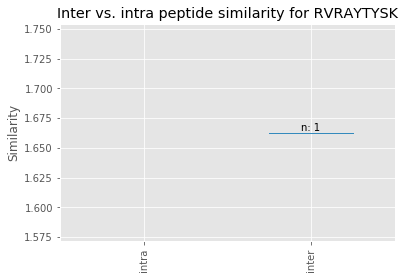

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


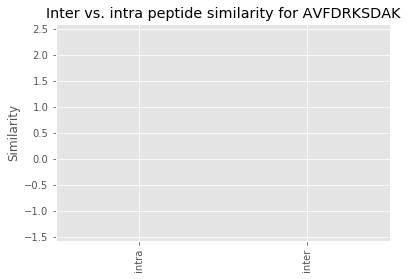

GPISGHVLK	0.00021188996012906888


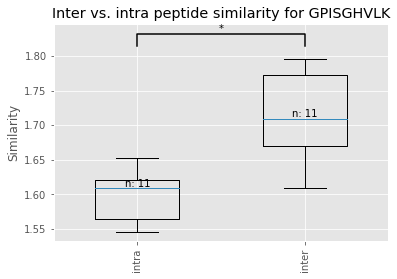

RYSIFFDY	0.009688126067567596


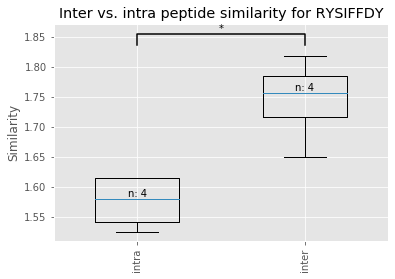

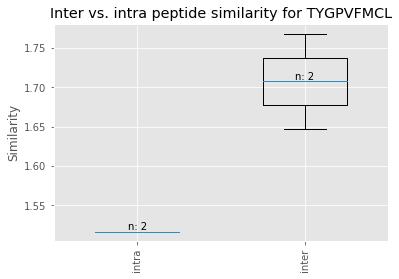

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


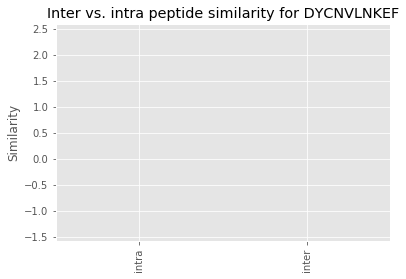

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values


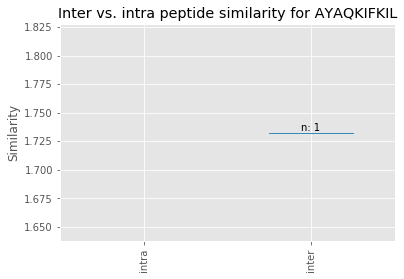

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values


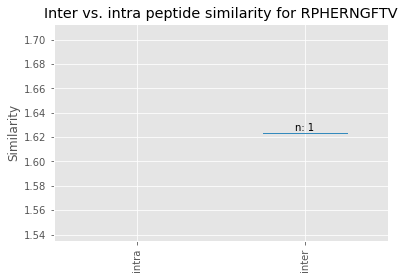

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


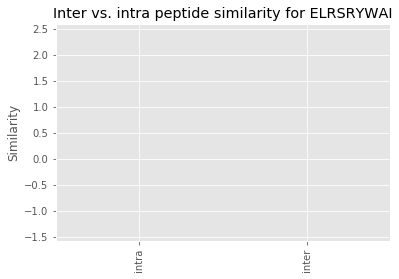

RAKFKQLL	0.00012043631724608778


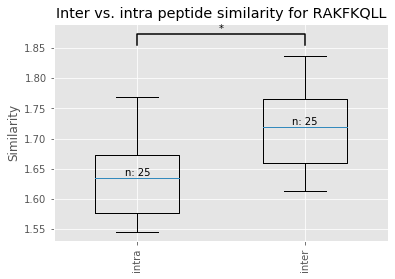

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values


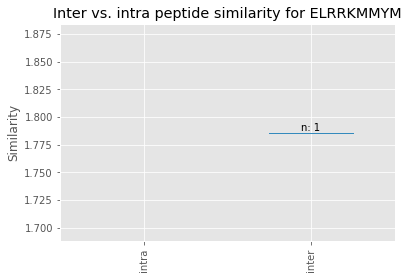

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


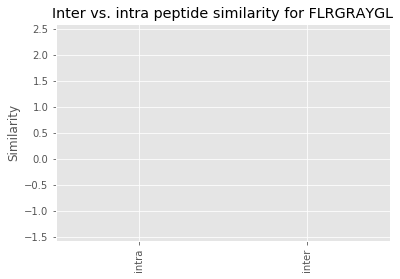

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


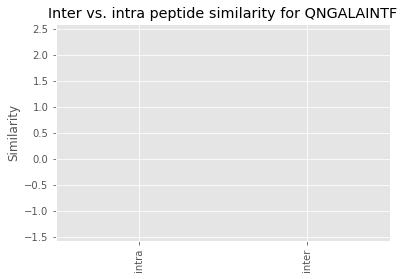

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


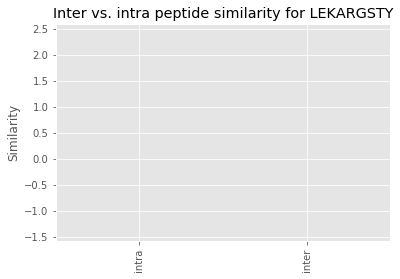

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


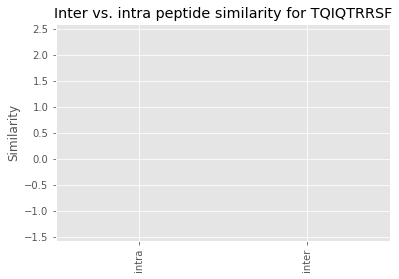

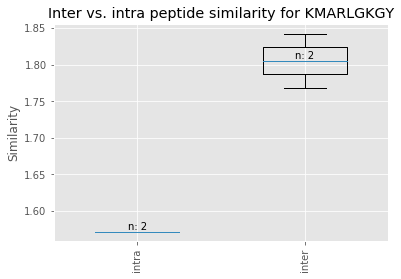

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values


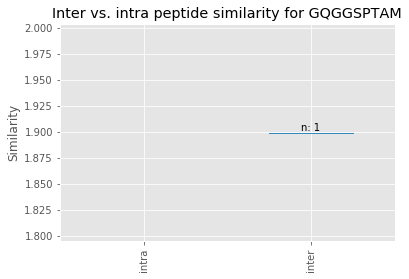

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


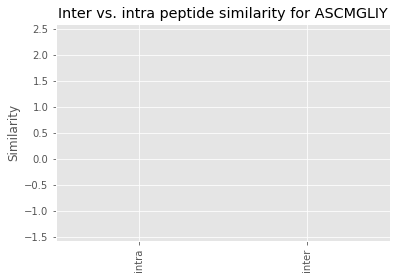

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values


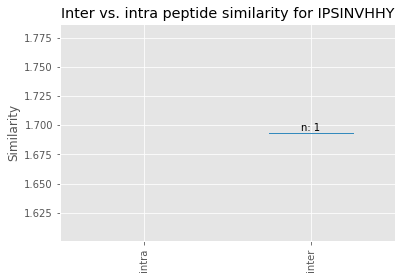

FRQKTNLIL	0.008511334104487015


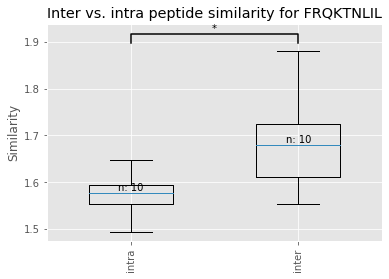

RLVVAVEEA_n37	0.002815050297042919


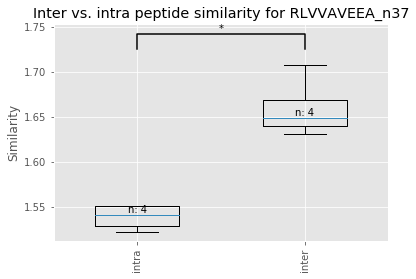

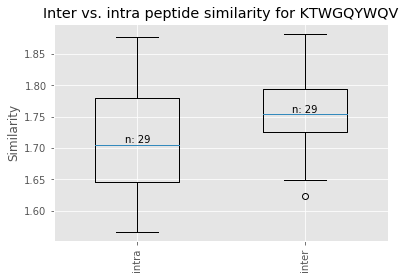

QIDVSQFGSY_n26	4.048437087468473e-08


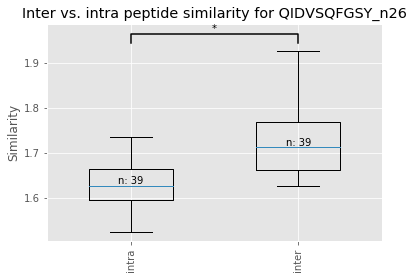

CLLWSFQTSA	0.03005989541021057


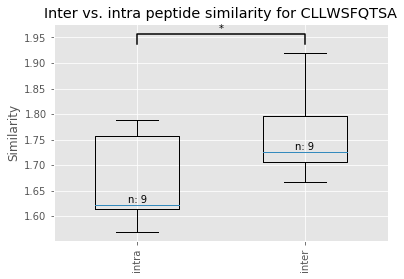

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


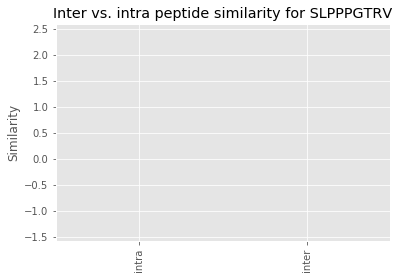

LLLFLAIFI_n37	0.015028475091712078


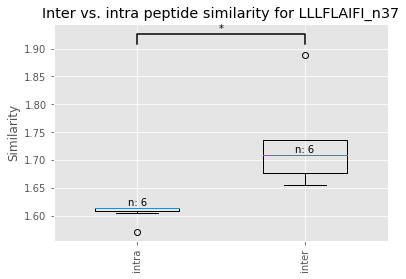

HAQAEASHLVY_n17	0.002627512046760684


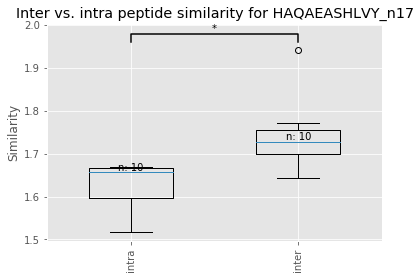

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


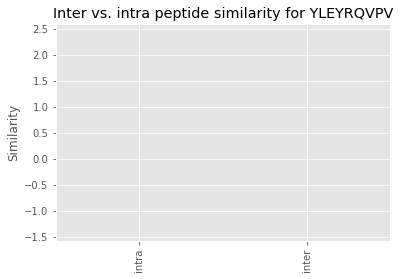

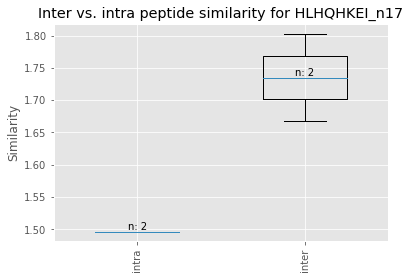

YLEPGPVTA	0.006010062574758699


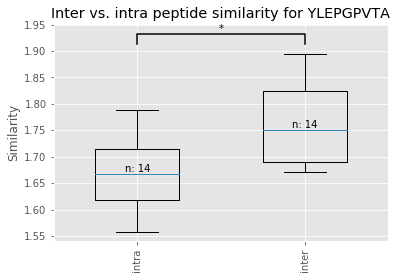

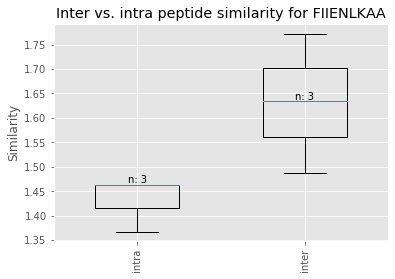

RLPRIFCSC	0.0017700628432035447


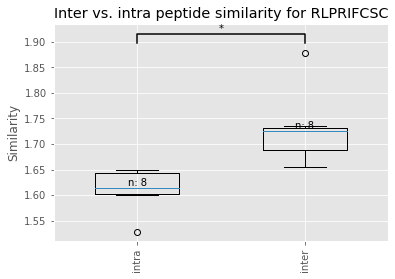

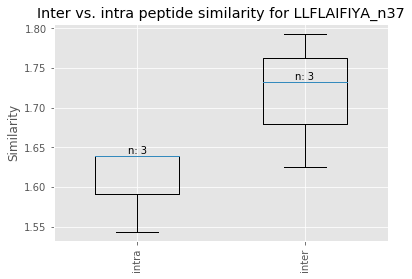

AGYLMELCC	0.007369040179997819


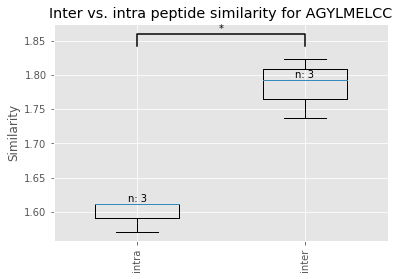

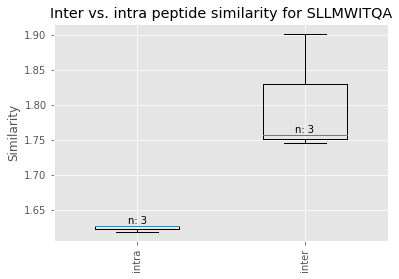

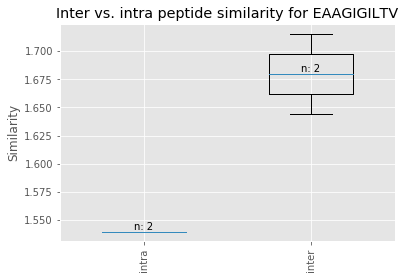

ILLLFLAIFI_n37	0.008809382764237064


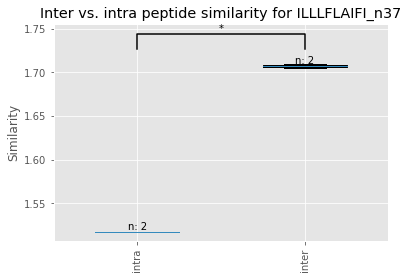

KVHPVIWSL	0.010805532556013738


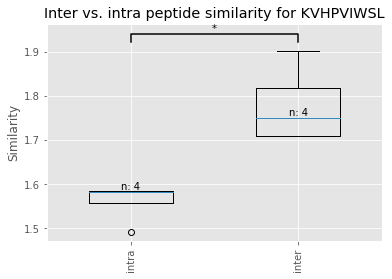

LVHFLLLKY	0.017786348164360973


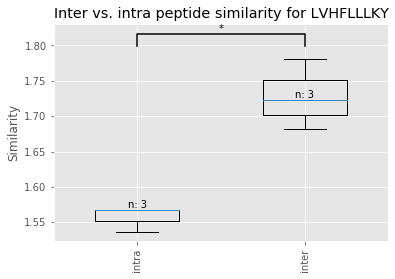

AMLGTHTMEV	0.01589343981060805


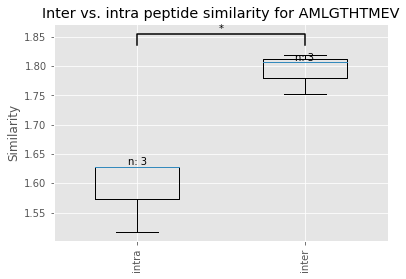

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


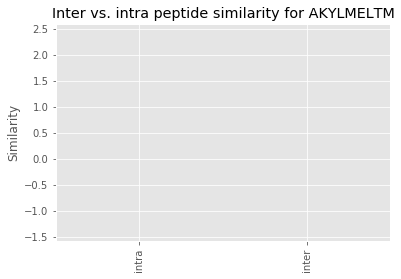

ALVDAGVPM	0.0005414341571695082


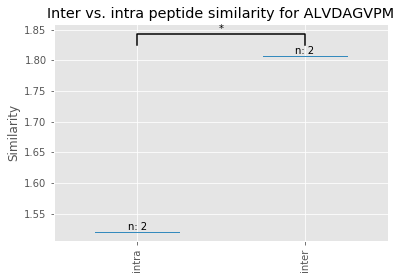

ITDQVPFSV	0.005347887567863302


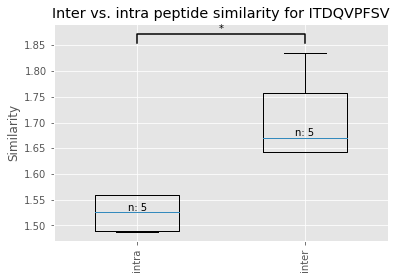

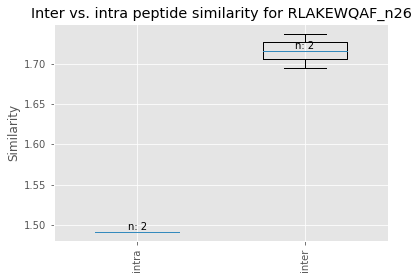

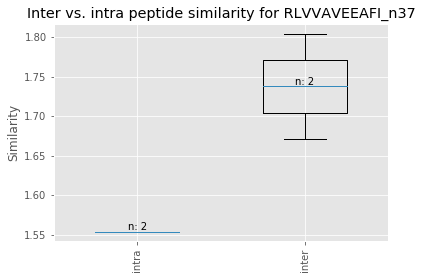

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values


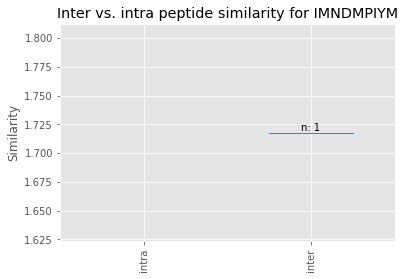

IMDQVPFSV	0.04144067285643754


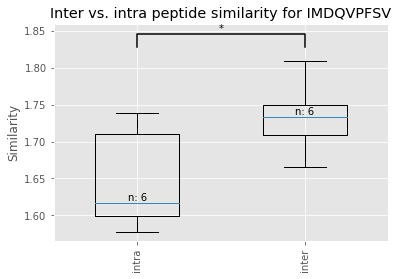

RLLASLQDL	0.0018903221842609327


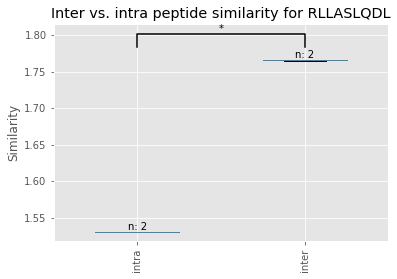

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values


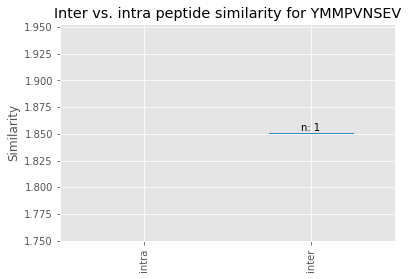

ELAGIGILTV	0.0023966319338226925


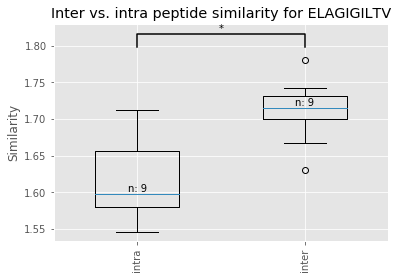

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values


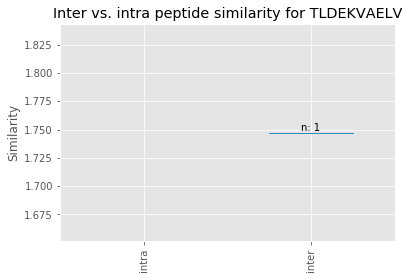

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


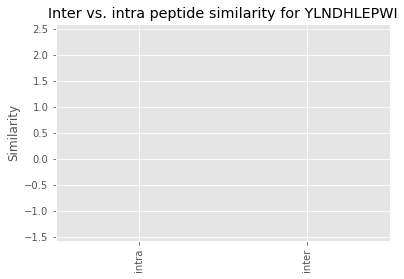

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


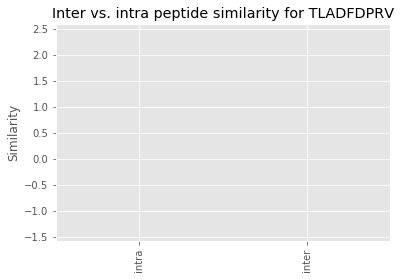

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values


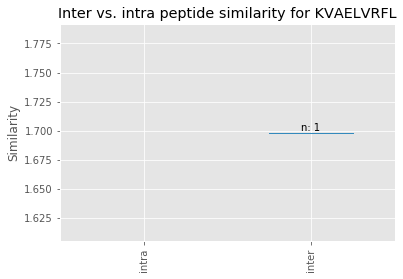

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values


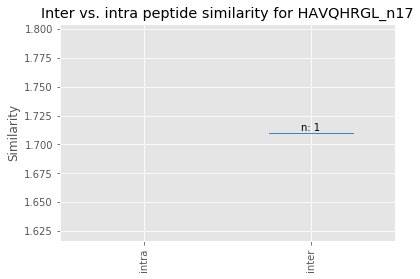

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


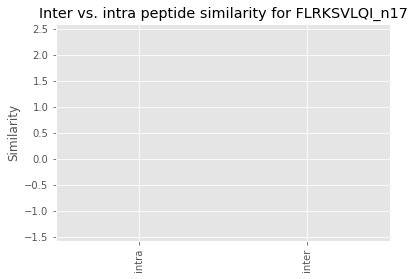

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


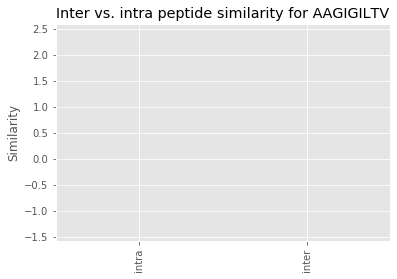

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


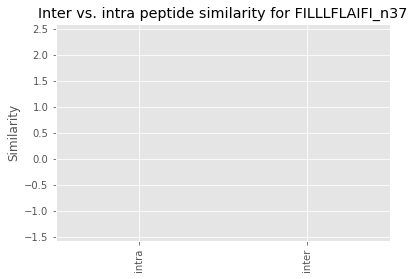

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


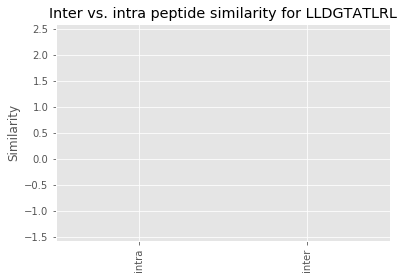

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


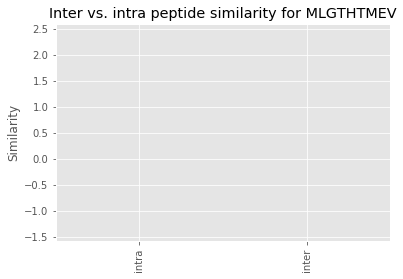

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


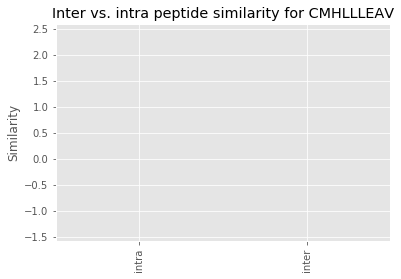

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values


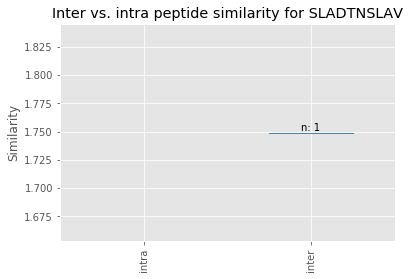

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


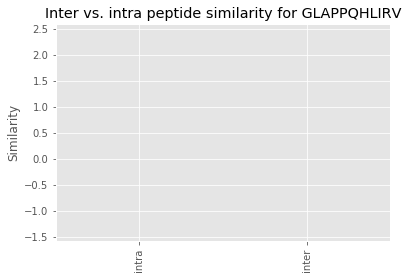

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


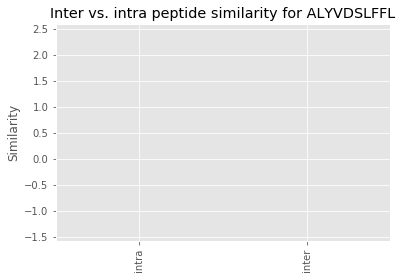

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values


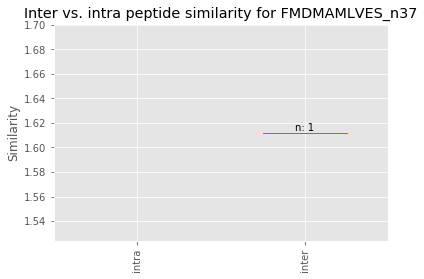

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


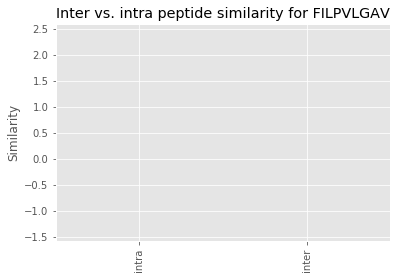

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values


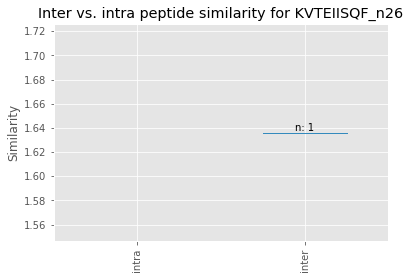

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


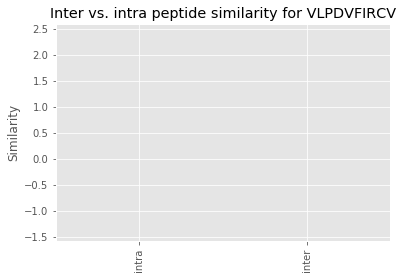

In [80]:
peptides = np.append(total_df.peptide.unique()[2:5], total_df.peptide.unique()[6:10])
peptides = total_df.peptide.unique()
df = total_df[total_df.peptide.isin(peptides)].drop_duplicates(subset=['cdr3']).set_index('gem') #NB! Removing GEMs with same CDR3 even though they bind different peptides
for pep in peptides:
    # Intra
    i = df[df.peptide == pep].drop_duplicates(subset=['cdr3']).index
    matrix = pd_fill_diagonal(df.loc[i,i], np.nan) #.iloc[i,i+5]
    matrix.columns = i
    intra = matrix.max()
    
    # Inter
    j = df[df.peptide != pep].drop_duplicates(subset=['cdr3']).index
    matrix = df.loc[j, i]
    inter = matrix.max()
    
    simila = pd.DataFrame([intra, inter])
    labels = ['intra', 'inter']
    
    plt.figure()
    plt.boxplot(simila, widths=(0.5, 0.5))
    plt.xticks(range(1, len(labels) + 1), labels, rotation=90)
    plt.ylabel("Similarity")
    plt.title("Inter vs. intra peptide similarity for %s" %pep)
    #plt.ylim((simila.min().min(),2.1))
    #plt.savefig(OUT_DIR + "selected_few/%s.pdf" %pep)
    
    # Text
    medians = simila.median(axis=1).values
    nobs = "n: %i" %simila.shape[1]
    for l in range(1, len(labels)+1):
        plt.text(l, medians[l-1], nobs, ha='center', va='bottom')#+medians[l-1]*0.005
    
    
    # Statistical annotation
    statistic, pvalue = stats.ttest_ind(simila.iloc[[0],:].values[0],
                                        simila.iloc[[1],:].values[0],
                                        equal_var=False)
    if pvalue < 0.05:
        print(pep, pvalue, sep="\t")
        y, h = simila.max().max() + simila.max().max() * 0.01, 2 * simila.max().max() * 0.005
        plt.plot([1, 1, 2, 2], [y, y+h, y+h, y], lw=1.5, c='k')
        plt.text(1.5, y+h, "*", ha='center', va='bottom', color='k')
    plt.show()

In [79]:
df.loc[indexes, i].max().sort_values(ascending=False)[:len(i)]

gem
TCAGCTCCATGGGACA-1    1.958096
CGACTTCCAACCGCCA-1    1.935348
ACTTACTTCGCCAGCA-1    1.925726
CGGGTCAAGGGCTCTC-1    1.918638
GTCGGGTGTTACTGAC-1    1.894430
                        ...   
CAGCCGACATCGGGTC-1    1.594483
GCTCTGTCATTGTGCA-1    1.585821
ATCCACCCAGCGTTCG-1    1.583720
AAAGATGCAGGTTTCA-1    1.574296
GGAAAGCAGCTAGTCT-1    1.554746
Length: 95, dtype: float64

# Find maximal intra- and inter-clonotype similarity

In [10]:
for clonotype in total_df.clonotype.unique():
    print(clonotype)
    break

clonotype1


In [17]:
total_df.groupby(['clonotype', 'peptide']).size().to_frame()

0
clonotype    peptide          
clonotype1   AYAQKIFKIL      1
             CLLWSFQTSA      2
             DYCNVLNKEF      1
             ELRRKMMYM       1
             FLYALALLL       5
...                         ..
clonotype976 YSEHPTFTSQY     1
clonotype977 QIDVSQFGSY_n26  1
clonotype978 RYSIFFDY        1
clonotype98  VSDGGPNLY       1
clonotype985 IMDQVPFSV       1

[1147 rows x 1 columns]